<a href="https://colab.research.google.com/github/SIRVALICIO/EvaluacionDeCalidadSolar/blob/main/DataFrame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import time
DataOriginal= pd.read_csv("radiación solar - SPEC.csv")
DataOriginal
import folium
import libpysal as ps
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable




In [ ]:

DataOriginal= DataOriginal.rename(columns={'4': 'index termporal', 'Paralela Bosque': 'Lugar' , 'Bucaramanga':'Locacion','Wunderground':'Estacion','7.080521':'Latitud','-73.110565':'Longitud','239.8':'Magnitud','2018-03-13T12:25':'Fecha/Hora'})
DataOriginal['Fecha/Hora']=pd.to_datetime( DataOriginal['Fecha/Hora'])
DataOriginal


,index termporal,Lugar,Locacion,Estacion,Latitud,Longitud,Magnitud,Fecha/Hora
0,5,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,525.7,2018-03-13 12:30:00
1,6,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,279.6,2018-03-13 12:35:00
2,7,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,305.6,2018-03-13 12:40:00
3,8,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,242.2,2018-03-13 12:45:00
4,9,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,430.3,2018-03-13 12:50:00
...,...,...,...,...,...,...,...,...
1047207,1047212,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,281.9,2018-03-13 12:00:00
1047208,1047190,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,218.5,2018-03-13 10:08:00
1047209,1047213,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,560.5,2018-03-13 12:05:00
1047210,1047205,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,461.5,2018-03-13 11:24:00


In [ ]:

DataAgrupada= pd.DataFrame(columns=["Lugar","Locacion",'Estacion','Latitud','Longitud','Magnitud','Fecha','Hora'])

DataAgrupada["Lugar"]=DataOriginal["Lugar"]
DataAgrupada["Locacion"]=DataOriginal["Locacion"]
DataAgrupada["Estacion"]=DataOriginal["Estacion"]
DataAgrupada["Latitud"]=DataOriginal["Latitud"]
DataAgrupada["Longitud"]=DataOriginal["Longitud"]
DataAgrupada["Magnitud"]=DataOriginal["Magnitud"]
DataAgrupada["Fecha"]=DataOriginal['Fecha/Hora'].dt.date
DataAgrupada["Hora"]=DataOriginal['Fecha/Hora'].dt.time

DataAgrupada



,Lugar,Locacion,Estacion,Latitud,Longitud,Magnitud,Fecha,Hora
0,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,525.7,2018-03-13,12:30:00
1,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,279.6,2018-03-13,12:35:00
2,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,305.6,2018-03-13,12:40:00
3,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,242.2,2018-03-13,12:45:00
4,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,430.3,2018-03-13,12:50:00
...,...,...,...,...,...,...,...,...
1047207,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,281.9,2018-03-13,12:00:00
1047208,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,218.5,2018-03-13,10:08:00
1047209,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,560.5,2018-03-13,12:05:00
1047210,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,461.5,2018-03-13,11:24:00


In [ ]:
muestrasort=DataAgrupada.sort_values("Fecha")
muestrasort

,Lugar,Locacion,Estacion,Latitud,Longitud,Magnitud,Fecha,Hora
750045,Centro,Bucaramanga,CDMB,7.119262,-73.127154,0.00,2010-01-01,22:00:00
779888,Norte,Bucaramanga,CDMB,7.149110,-73.134533,0.00,2010-01-01,01:00:00
750041,Centro,Bucaramanga,CDMB,7.119262,-73.127154,224.00,2010-01-01,16:00:00
750040,Centro,Bucaramanga,CDMB,7.119262,-73.127154,0.00,2010-01-01,18:00:00
750038,Centro,Bucaramanga,CDMB,7.119262,-73.127154,430.00,2010-01-01,15:00:00
...,...,...,...,...,...,...,...,...
712726,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,428.56,2021-01-28,13:59:47
712728,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,106.02,2021-01-28,17:59:47
712729,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,432.71,2021-01-28,11:59:47
712720,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,300.28,2021-01-28,09:59:47


In [ ]:
DataAgrupada.to_csv(r'DatosReOrdenados.csv')

In [ ]:
DataAgrupada["Hora"] =  pd.to_datetime(DataAgrupada["Hora"], format='%H:%M:%S')
DataAgrupada["Fecha"] =  pd.to_datetime(DataAgrupada["Fecha"])

DataAgrupada=DataAgrupada[(DataAgrupada['Hora']>= pd.to_datetime( "13:00:00" , format='%H:%M:%S')) & (DataAgrupada['Hora'] <pd.to_datetime( "14:00:00" , format='%H:%M:%S'))]
DataAgrupada["Hora"]=DataAgrupada['Hora'].dt.time

DataAgrupada




<ipython-input-165-7f4a5b0459ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataAgrupada["Hora"]=DataAgrupada['Hora'].dt.time


,Lugar,Locacion,Estacion,Latitud,Longitud,Magnitud,Fecha,Hora
6,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,562.9,2018-03-13,13:00:00
8,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,266.3,2018-03-13,13:10:00
9,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,213.4,2018-03-13,13:16:00
10,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,212.6,2018-03-13,13:21:00
11,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,226.1,2018-03-13,13:05:00
...,...,...,...,...,...,...,...,...
1046944,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,585.4,2018-03-12,13:36:00
1046945,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,586.3,2018-03-12,13:41:00
1046946,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,566.7,2018-03-12,13:46:00
1046947,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,278.1,2018-03-12,13:51:00


In [ ]:
DataAgrupada.to_csv(r'DatosReOrdenados.csv')
ColumnaFechas= DataAgrupada["Fecha"].drop_duplicates()

Estaciones= DataAgrupada["Lugar"]
Estaciones=Estaciones.sort_values().drop_duplicates()

In [ ]:
ColumnaFechas.sort_values()
DatosAtipivos = pd.DataFrame()

for l in Estaciones:



    DataAgrupada2=DataAgrupada[(DataAgrupada['Lugar']==l)]


    for i in ColumnaFechas:
        Datosremporales=DataAgrupada2[(DataAgrupada2['Fecha']== i) ]


        Datosremporales= Datosremporales.sort_values("Magnitud")

        if(Datosremporales["Magnitud"].size>2):
            Datosremporales = Datosremporales.reset_index()


            Ecuacion1= (Datosremporales["Magnitud"].size+ 1)/4

            Ecuacion3=3*((Datosremporales["Magnitud"].size+ 1)/4)

            if int(Ecuacion1)!=Ecuacion1:
                if(int(Ecuacion1)>=0 and int(Ecuacion1)<1 ):
                    Q1=Datosremporales["Magnitud"][int(Ecuacion1)]+ (Ecuacion1-int(Ecuacion1)) * (Datosremporales["Magnitud"][int(Ecuacion1)+1]-Datosremporales["Magnitud"][int(Ecuacion1)])
                else:
                     Q1=Datosremporales["Magnitud"][int(Ecuacion1)-1]+ (Ecuacion1-int(Ecuacion1))*(Datosremporales["Magnitud"][int(Ecuacion1)]-Datosremporales["Magnitud"][int(Ecuacion1)-1])



            else:
                if (int(Ecuacion1) >= 0 and int(Ecuacion1) < 1):
                    Q1 = Datosremporales["Magnitud"][int(Ecuacion1)]
                else:
                    Q1 = Datosremporales["Magnitud"][int(Ecuacion1) - 1]


            if int(Ecuacion1)!=Ecuacion1:
                if (int(Ecuacion3) >= 0 and int(Ecuacion3) < 1):
                    Q3=Datosremporales["Magnitud"][int(Ecuacion3)] + (Ecuacion3 - int(Ecuacion3)) * (
                                Datosremporales["Magnitud"][int(Ecuacion3) + 1] - Datosremporales["Magnitud"][int(Ecuacion3)])


                else:
                    Q3 = Datosremporales["Magnitud"][int(Ecuacion3) - 1] + (Ecuacion3 - int(Ecuacion3)) * (Datosremporales["Magnitud"][int(Ecuacion3)] - Datosremporales["Magnitud"][int(Ecuacion3) - 1])
            else:
                if (int(Ecuacion3) >= 0 and int(Ecuacion3) < 1):
                    Q3 = Datosremporales["Magnitud"][int(Ecuacion3)]


                else:

                    Q3 = Datosremporales["Magnitud"][int(Ecuacion3) - 1]



            IQR= Q3-Q1
            LimI= Q1-(1.5*(IQR))
            LimS = Q3 +  (1.5 * (IQR))

            ciclo=Datosremporales["Magnitud"].size

            cont=0

            for j in range(0, ciclo):



                a=Datosremporales["Magnitud"][j]


                if((a<=LimI or a>=LimS) and (a!=Datosremporales["Magnitud"][0]  and  a!=Datosremporales["Magnitud"][Datosremporales["Magnitud"].size -1])):


                    DatosAtipivos=DatosAtipivos.append(Datosremporales.iloc[[j]])





DatosAtipivos
DataAgrupadaGraficar=DataAgrupada[(DataAgrupada["Fecha"]>=pd.to_datetime( "2018:09:12" , format='%Y:%m:%d'))& (DataAgrupada["Fecha"]<=pd.to_datetime( "2018:09:25" , format='%Y:%m:%d'))]


DataAgrupadaGraficar=DataAgrupadaGraficar[DataAgrupadaGraficar["Lugar"]=="Paralela Bosque"]


DatosAtipivos[:50]


,index,Lugar,Locacion,Estacion,Latitud,Longitud,Magnitud,Fecha,Hora
10,9544,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,384.2,2018-04-20,13:31:00
9,13130,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,337.3,2018-05-03,13:02:00
10,20694,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,583.8,2018-05-30,13:02:00
10,21248,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,544.0,2018-06-01,13:04:37
1,25196,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,251.6,2018-06-22,13:39:48
20,32122,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,357.3,2018-07-20,13:09:55
21,61385,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,390.8,2018-07-20,13:34:52
22,61384,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,440.8,2018-07-20,13:29:48
1,61956,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,233.8,2018-07-22,13:59:54
21,65387,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,590.3,2018-08-03,13:34:52


<function matplotlib.pyplot.show(close=None, block=None)>

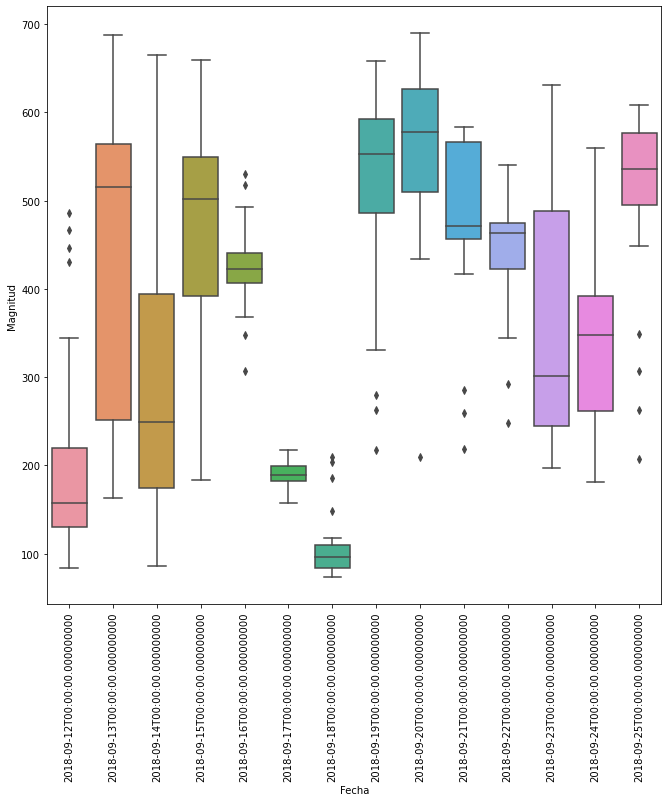

In [ ]:
plt.figure(figsize=(11,11))
sns.boxplot(x=DataAgrupadaGraficar["Fecha"],y=DataAgrupadaGraficar["Magnitud"],showfliers= True)
plt.xticks(rotation=90)
plt.show

In [ ]:
DataAgrupada=DataAgrupada.drop(DatosAtipivos['index'])




In [ ]:
DatosAtipivos.to_csv(r'DatosAtipicos.csv')
DatosAtipivos


DatosAtipivos


,index,Lugar,Locacion,Estacion,Latitud,Longitud,Magnitud,Fecha,Hora
10,9544,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,384.2,2018-04-20,13:31:00
9,13130,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,337.3,2018-05-03,13:02:00
10,20694,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,583.8,2018-05-30,13:02:00
10,21248,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,544.0,2018-06-01,13:04:37
1,25196,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,251.6,2018-06-22,13:39:48
...,...,...,...,...,...,...,...,...,...
1,558476,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,415.4,2020-07-13,13:59:46
10,568343,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,94.9,2020-08-18,13:54:56
10,570034,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,357.1,2020-08-24,13:09:52
1,572884,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,194.9,2020-09-03,13:24:47


In [ ]:
DataAgrupada
DatosAtipivos
DatosAtipivos=DatosAtipivos.reset_index()



del DatosAtipivos["level_0"]

del DatosAtipivos["index"]

DatosAtipivos



,Lugar,Locacion,Estacion,Latitud,Longitud,Magnitud,Fecha,Hora
0,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,384.2,2018-04-20,13:31:00
1,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,337.3,2018-05-03,13:02:00
2,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,583.8,2018-05-30,13:02:00
3,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,544.0,2018-06-01,13:04:37
4,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,251.6,2018-06-22,13:39:48
...,...,...,...,...,...,...,...,...
263,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,415.4,2020-07-13,13:59:46
264,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,94.9,2020-08-18,13:54:56
265,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,357.1,2020-08-24,13:09:52
266,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,194.9,2020-09-03,13:24:47


In [ ]:











Datostipicos=DataAgrupada.copy()
DatosTotal= pd.DataFrame(columns=["Lugar","Locacion",'Estacion','Latitud','Longitud','Magnitud','Fecha','Hora'])



for i in range(0, (DatosAtipivos["Magnitud"].size)):



    reemplzar= DatosAtipivos.iloc[i]


    x=str( reemplzar["Hora"])
    x=x[0:5]
    x=x.replace(":","")

    x=int(x)


    DatosLagrange= DataAgrupada[DataAgrupada["Lugar"]==DatosAtipivos.iloc[i,0] ]
    DatosLagrange=DatosLagrange[DatosLagrange["Fecha"]==DatosAtipivos.iloc[i,6]]

    DatosLagrange = DatosLagrange.sort_values("Hora")
    DatosLagrange=DatosLagrange.reset_index()
    del DatosLagrange["index"]






    vectorxi=[]

    vectorfxi=[]

    for l in range(0, DatosLagrange["Fecha"].size):

        hora=str( DatosLagrange.iloc[l,7])
        hora=hora[0:5]
        hora=hora.replace(":","")
        hora=int(hora)
        magnitud = DatosLagrange.iloc[l, 5]


        if hora in vectorxi:
            continue

        else:
            vectorxi.append(hora)
            vectorfxi.append(magnitud)

    grado=len(vectorxi)
    total=0



    for m in range(0, grado):

        acumulado=1
        for n in range(0,grado):
            if(m!=n):

                resultado=  ((x-vectorxi[n])/(vectorxi[m]-vectorxi[n]))
                acumulado=acumulado*resultado
        acumulado=acumulado*vectorfxi[m]
        total=total+acumulado

    if total < 0 or total > 3 * max(vectorfxi):

        cont=0
        x1=0
        x0=0
        fx1=0
        fx0=0

        for p in vectorxi:
            if p>x:
                x1=p
                fx1 = vectorfxi[cont]
                posicionantes = cont - 1
                try:
                    x0=vectorxi[cont]

                    fx0=vectorfxi[posicionantes]
                except:
                    x0 = 0
                    fx0 = 0

            cont+=1
        try:
                total= fx0 + (((fx1-fx0)/(x1-x0))*(x-x0))
        except:
            total= max(vectorfxi)-2


        if total<0:
            total= fx0-2
        elif total>3 * max(vectorfxi):
            total=fx0+2
    print(total)


    DatosArreglados = pd.DataFrame(
        columns=["Lugar", "Locacion", 'Estacion', 'Latitud', 'Longitud', 'Magnitud', 'Fecha', 'Hora'],data=[[reemplzar["Lugar"],reemplzar["Locacion"],reemplzar["Estacion"],reemplzar["Latitud"],reemplzar["Longitud"],total,reemplzar["Fecha"],reemplzar["Hora"]]])


    DatosTotal=DatosTotal.append(DatosArreglados,ignore_index=True)









408.3229437229438
185.1
259.9
34.2
382.1157575757578
127.6
282.0
155.6
643.8
293.0
156.5
556.9
654.4
566.4
120.7
186.2
145.8


<ipython-input-172-245d17fc446e>:91: RuntimeWarning: divide by zero encountered in double_scalars
  total= fx0 + (((fx1-fx0)/(x1-x0))*(x-x0))


160.0
407.4
102.1
110.5
530.7
609.2
453.3
463.3
463.3
448.2
479.3
433.6
476.3
502.4
185.2
482.5
619.4
105.6
155.1
147.3
140.9
506.9
127.2
38.42909090909113
340.3330303030306
229.55844155844156
158.5327272727283
467.3
520.9745454545459
199.4
417.5
452.6
516.2
436.6
79.92181818181867
395.6406060606063
205.6006060606063
423.2
856.3
921.9
986.5355018968926
451.81478545057416
319.6
754.9
664.0262038949872
550.3390334846555
378.2
914.4953186415418
2664.4679684848625
874.6
139.3
200.8
75.75091533500466
1020.2728166027684
139.4
727.6090909090899
283.1
653.2
714.5
46.91606951871729
597.7
100.82003933088251
401.2
109.80888654449534
595.4
481.615845697096
992.4399609393174
798.1240809036661
713.5
688.8
699.2290909090924
653.9033870266404
756.9838944867394
519.5269367267589
365.19821428571436
269.3935064935065
793.1
772.0195374393556
512.1327468043077
819.63408826197
279.6973882087409
404.1748798540555
585.8893098537135
552.5
324.524249473954
484.3
518.5
569.7150789163202
581.8417428016375
378.8
5

<ipython-input-172-245d17fc446e>:91: RuntimeWarning: invalid value encountered in double_scalars
  total= fx0 + (((fx1-fx0)/(x1-x0))*(x-x0))


271.5
1322.2951515151517
384.0114718614719
55.93636363636426
501.432251082251
273.73333333333363
413.1090909090941
575.0
760.0727272727312
347.74909090909085
283.8675324675324
856.3
921.9
986.5355018968926
451.81478545057416
319.6
754.9
664.0262038949872
550.3390334846555
378.2
914.4953186415418
2664.4679684848625
874.6
139.3
200.8
75.75091533500466
1020.2728166027684
139.4
727.6090909090899
283.1
653.2
714.5
46.91606951871729
597.7
100.82003933088251
401.2
109.80888654449534
595.4
481.615845697096
992.4399609393174
798.1240809036661
713.5
688.8
699.2290909090924
653.9033870266404
756.9838944867394
519.5269367267589
365.19821428571436
269.3935064935065
793.1
772.0195374393556
512.1327468043077
819.63408826197
279.6973882087409
404.1748798540555
585.8893098537135
552.5
324.524249473954
484.3
518.5
569.7150789163202
581.8417428016375
378.8
543.5
598.8
592.2199134199134
460.5
349.00021645021644
201.4
167.6
509.0900432900431
535.6
1346.2181818181818
523.7
501.2163636363661
124.772727272728

In [ ]:
DatosTotal

,Lugar,Locacion,Estacion,Latitud,Longitud,Magnitud,Fecha,Hora
0,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,408.322944,2018-04-20,13:31:00
1,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,185.100000,2018-05-03,13:02:00
2,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,259.900000,2018-05-30,13:02:00
3,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,34.200000,2018-06-01,13:04:37
4,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,382.115758,2018-06-22,13:39:48
...,...,...,...,...,...,...,...,...
263,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,591.900000,2020-07-13,13:59:46
264,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,178.736364,2020-08-18,13:54:56
265,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,214.554545,2020-08-24,13:09:52
266,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,513.463333,2020-09-03,13:24:47


In [ ]:
frames=[Datostipicos,DatosTotal]
resultado=pd.concat(frames)
resultado

,Lugar,Locacion,Estacion,Latitud,Longitud,Magnitud,Fecha,Hora
6,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,562.900000,2018-03-13,13:00:00
8,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,266.300000,2018-03-13,13:10:00
9,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,213.400000,2018-03-13,13:16:00
10,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,212.600000,2018-03-13,13:21:00
11,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,226.100000,2018-03-13,13:05:00
...,...,...,...,...,...,...,...,...
263,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,591.900000,2020-07-13,13:59:46
264,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,178.736364,2020-08-18,13:54:56
265,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,214.554545,2020-08-24,13:09:52
266,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,513.463333,2020-09-03,13:24:47


In [ ]:
resultado=resultado.reset_index()
del resultado["index"]

resultado


,Lugar,Locacion,Estacion,Latitud,Longitud,Magnitud,Fecha,Hora
0,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,562.900000,2018-03-13,13:00:00
1,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,266.300000,2018-03-13,13:10:00
2,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,213.400000,2018-03-13,13:16:00
3,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,212.600000,2018-03-13,13:21:00
4,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,226.100000,2018-03-13,13:05:00
...,...,...,...,...,...,...,...,...
44089,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,591.900000,2020-07-13,13:59:46
44090,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,178.736364,2020-08-18,13:54:56
44091,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,214.554545,2020-08-24,13:09:52
44092,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,513.463333,2020-09-03,13:24:47


In [ ]:
DataAgrupadaGraficar=resultado[(resultado["Fecha"]>=pd.to_datetime( "2018:09:12" , format='%Y:%m:%d'))& (resultado["Fecha"]<=pd.to_datetime( "2018:09:25" , format='%Y:%m:%d'))]


DataAgrupadaGraficar=DataAgrupadaGraficar[DataAgrupadaGraficar["Lugar"]=="Paralela Bosque"]


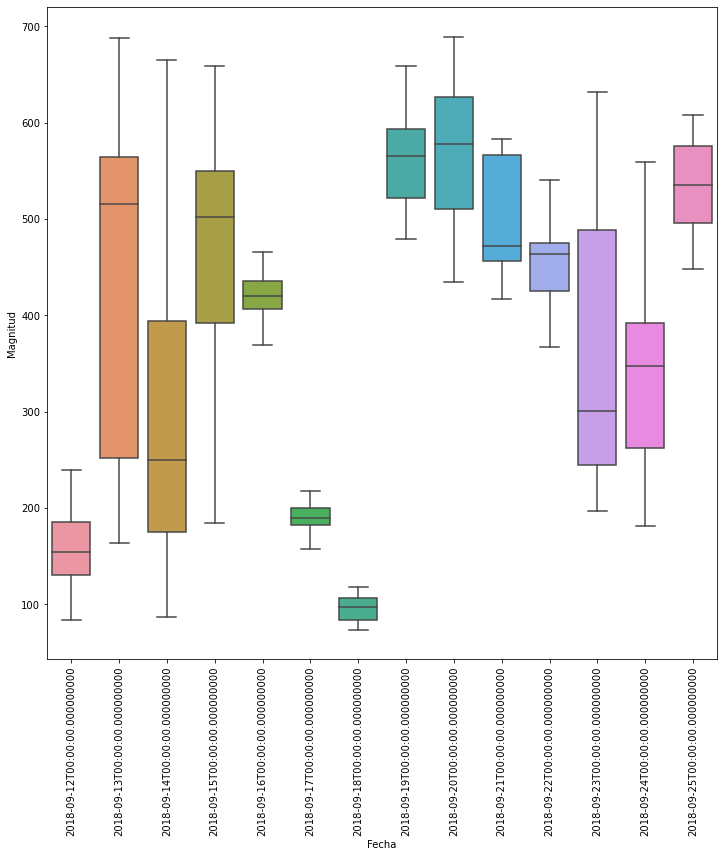

In [ ]:
plt.figure(figsize=(12,12))
sns.boxplot(x=DataAgrupadaGraficar["Fecha"],y=DataAgrupadaGraficar["Magnitud"],showfliers = False)
plt.xticks(rotation=90)
plt.show()

In [ ]:
resultado.to_csv(r'DatosCorregidos.csv')
print(resultado["Lugar"].value_counts())

Paralela Bosque      19674
UPB - Piedecuesta    17902
Norte                 1874
Ciudadela             1691
Florida               1584
Centro                1369
Name: Lugar, dtype: int64


In [ ]:
CopiaDeLaBase=resultado



del CopiaDeLaBase["Hora"]

CopiaDeLaBase

datosOctubre=CopiaDeLaBase[(CopiaDeLaBase["Fecha"]>= pd.to_datetime( "2016:10:1" , format='%Y:%m:%d')) &  (CopiaDeLaBase["Fecha"]<=pd.to_datetime( "2016:10:31" , format='%Y:%m:%d'))  ]
datosOctubre

print(datosOctubre["Lugar"].value_counts())
datosOctubre

UPB - Piedecuesta    324
Paralela Bosque      324
Ciudadela             30
Florida               29
Name: Lugar, dtype: int64


,Lugar,Locacion,Estacion,Latitud,Longitud,Magnitud,Fecha
9249,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,7.30000,2016-10-01
9250,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,7.60000,2016-10-01
9251,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,9.90000,2016-10-01
9252,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,11.30000,2016-10-01
9253,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,11.30000,2016-10-01
...,...,...,...,...,...,...,...
39123,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,26.90000,2016-10-31
43901,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,714.50000,2016-10-04
43902,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,46.91607,2016-10-11
44025,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,714.50000,2016-10-04


In [ ]:
datosMarzo=CopiaDeLaBase[(CopiaDeLaBase["Fecha"]>= pd.to_datetime( "2016:3:1" , format='%Y:%m:%d')) &  (CopiaDeLaBase["Fecha"]<= pd.to_datetime( "2016:3:31" , format='%Y:%m:%d'))  ]
print(datosMarzo["Lugar"].value_counts())
datosMarzo

UPB - Piedecuesta    330
Paralela Bosque      330
Florida               31
Ciudadela             27
Name: Lugar, dtype: int64


,Lugar,Locacion,Estacion,Latitud,Longitud,Magnitud,Fecha
7158,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,707.400000,2016-03-01
7159,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,696.200000,2016-03-01
7160,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,697.000000,2016-03-01
7161,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,720.000000,2016-03-01
7162,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,762.900000,2016-03-01
...,...,...,...,...,...,...,...
43889,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,378.200000,2016-03-24
43890,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,914.495319,2016-03-27
44012,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,550.339033,2016-03-05
44013,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,378.200000,2016-03-24


In [ ]:
del CopiaDeLaBase["Fecha"]
del CopiaDeLaBase["Magnitud"]



CopiaDeLaBase=CopiaDeLaBase.drop_duplicates()
CopiaDeLaBase

,Lugar,Locacion,Estacion,Latitud,Longitud
0,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565
6530,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649
29565,Ciudadela,Bucaramanga,CDMB,7.105772,-73.123730
31256,Centro,Bucaramanga,CDMB,7.119262,-73.127154
32625,Norte,Bucaramanga,CDMB,7.149110,-73.134533
34499,Florida,Floridablanca,CDMB,7.072035,-73.106186


In [ ]:
def interpolacionEspacial(distancias, magnitudes, b):
    sumatoria_numerador = 0
    sumatoria_denominador = 0

    dato_minimo = 0
    dato_maximo = 0

    for i in range(0, len(distancias)):

        sumatoria_numerador = sumatoria_numerador + magnitudes[i] / distancias[i] ** b
        sumatoria_denominador = sumatoria_denominador + 1 / distancias[i] ** b

        if (i == 0):
            dato_minimo = sumatoria_numerador

        if (i == (len(distancias) - 1)):
            dato_maximo = magnitudes[i] / distancias[i] ** b

    s_j = sumatoria_numerador / sumatoria_denominador

    if ((s_j > dato_minimo) and (s_j < dato_maximo)):

        return s_j

    else:

        interpolacionEspacial(distancias, magnitudes, b + 1)

diccionarioOctubre={"Paralela Bosque":0.807 ,"UPB - Piedecuesta":5.88,"Norte":8.78,"Ciudadela":3.9,"Florida":0.483,"Centro": 5.4}
diccionarioMartzo={"Paralela Bosque":1.28 ,"UPB - Piedecuesta":7.42 ,"Norte":6.99,"Ciudadela":2.03,"Florida":2.28,"Centro": 3.58}
def reolverInterpolacion (dataframe, diccionario):
    Datosappend = pd.DataFrame(
        columns=["Lugar", "Locacion", 'Estacion', 'Latitud', 'Longitud', 'Magnitud', 'Fecha'])
    estacion=dataframe["Lugar"].drop_duplicates()
    for esta in estacion:
        datospuntuales= dataframe[dataframe["Lugar"]==esta]
        fechas= datospuntuales["Fecha"].drop_duplicates()
        for fec in fechas:

            datosespecificos= datospuntuales[datospuntuales["Fecha"]==fec]
            reemplzar = datosespecificos.iloc[0]
            promedio= datosespecificos["Magnitud"].mean()

            Datostemp = pd.DataFrame(
                columns=["Lugar", "Locacion", 'Estacion', 'Latitud', 'Longitud', 'Magnitud', 'Fecha'], data=[
                    [reemplzar["Lugar"], reemplzar["Locacion"], reemplzar["Estacion"], reemplzar["Latitud"],
                     reemplzar["Longitud"], promedio, reemplzar["Fecha"]]])
            Datosappend=Datosappend.append(Datostemp,ignore_index=True)



    fechasEspacial= Datosappend["Fecha"].drop_duplicates()
    dataresultante=pd.DataFrame(columns=["Fecha","Resultado"])
    for fechEs in  fechasEspacial:
        seleccioninterpolar= Datosappend[Datosappend["Fecha"]==fechEs]
        seleccioninterpolar=seleccioninterpolar.sort_values("Magnitud")



        distancias=[]

        lugarDistancias=seleccioninterpolar["Lugar"]
        for lg in lugarDistancias:
            distancias.append(diccionario[str(lg)])
        magnitudes=seleccioninterpolar["Magnitud"].to_numpy()


        total=interpolacionEspacial(distancias,magnitudes,0)
        datalista=pd.DataFrame(columns=["Fecha","Resultado"],data=[[fechEs,total]])
        dataresultante=dataresultante.append(datalista,ignore_index=True)
    return dataresultante



In [ ]:
interpolacionOctubre=reolverInterpolacion(datosOctubre,diccionarioOctubre)

promedioOctubre= interpolacionOctubre["Resultado"].mean()
print(datosOctubre["Lugar"].value_counts())
print("El resultado de la interpolación de Octubre es:")
interpolacionOctubre



UPB - Piedecuesta    324
Paralela Bosque      324
Ciudadela             30
Florida               29
Name: Lugar, dtype: int64
El resultado de la interpolación de Octubre es:


,Fecha,Resultado
0,2016-10-01,10.472222
1,2016-10-02,126.862500
2,2016-10-03,86.883333
3,2016-10-04,224.831818
4,2016-10-05,405.392857
5,2016-10-06,166.100000
6,2016-10-07,390.879167
7,2016-10-08,213.012500
8,2016-10-09,283.954167
9,2016-10-10,484.700000


In [ ]:
print("El promedio de la radiacion solar es: " +str(promedioOctubre))

El promedio de la radiacion solar es: 285.77132995891407


In [ ]:
interpolacionMarzo=reolverInterpolacion(datosMarzo,diccionarioMartzo)

promedioMarzo= interpolacionMarzo["Resultado"].mean()
print(datosMarzo["Lugar"].value_counts())
print("El resultado de la interpolación de Marzo es:")
interpolacionMarzo

UPB - Piedecuesta    330
Paralela Bosque      330
Florida               31
Ciudadela             27
Name: Lugar, dtype: int64
El resultado de la interpolación de Marzo es:


,Fecha,Resultado
0,2016-03-01,466.087500
1,2016-03-02,455.035000
2,2016-03-03,457.200000
3,2016-03-04,298.645833
4,2016-03-05,294.879047
5,2016-03-06,394.887500
6,2016-03-07,336.277273
7,2016-03-08,452.709091
8,2016-03-09,381.561111
9,2016-03-10,469.577778


In [ ]:
print("El promedio de la radiacion solar es: " +str(promedioMarzo))

El promedio de la radiacion solar es: 399.2888582932494


In [ ]:
m = folium.Map(location=[7.080521, -73.110565], zoom_start=12)

folium.Marker(
    [7.080521, -73.110565], popup="Paralela Bosque"
).add_to(m)
folium.Marker(
    [7.038574, -73.069649], popup="UPB - Piedecuesta"
).add_to(m)
folium.Marker(
    [7.105772, -73.123730], popup="Ciudadela"
).add_to(m)
folium.Marker(
    [7.119262, -73.127154], popup="Centro"
).add_to(m)
folium.Marker(
    [7.149110, -73.134533], popup="Norte"
).add_to(m)
folium.Marker(
    [7.072035, -73.106186], popup="Florida"
).add_to(m)
m

In [ ]:
m = folium.Map(location=[7.080521, -73.110565], zoom_start=12)

folium.Marker(
    [7.080521, -73.110565], popup="Paralela Bosque"
).add_to(m)
folium.Marker(
    [7.038574, -73.069649], popup="UPB - Piedecuesta"
).add_to(m)
folium.Marker(
    [7.105772, -73.123730], popup="Ciudadela"
).add_to(m)
folium.Marker(
    [7.119262, -73.127154], popup="Centro"
).add_to(m)
folium.Marker(
    [7.149110, -73.134533], popup="Norte"
).add_to(m)
folium.Marker(
    [7.072035, -73.106186], popup="Florida"
).add_to(m)
folium.Marker(
    [7.08526045, -73.1192428760099], popup="INEM - Custodio García Rovira", icon=folium.Icon(color="red", icon="info-sign")
).add_to(m)




m

In [ ]:
m = folium.Map(location=[7.080521, -73.110565], zoom_start=12)

folium.Marker(
    [7.080521, -73.110565], popup="Paralela Bosque"
).add_to(m)
folium.Marker(
    [7.038574, -73.069649], popup="UPB - Piedecuesta"
).add_to(m)
folium.Marker(
    [7.105772, -73.123730], popup="Ciudadela"
).add_to(m)
folium.Marker(
    [7.119262, -73.127154], popup="Centro"
).add_to(m)
folium.Marker(
    [7.149110, -73.134533], popup="Norte"
).add_to(m)
folium.Marker(
    [7.072035, -73.106186], popup="Florida"
).add_to(m)
folium.Marker(
    [7.0731729, -73.109957], popup="Clinica Foscal", icon=folium.Icon(color="red", icon="info-sign")
).add_to(m)




m

In [ ]:
def resolverPromedio (dataframe):
    Datosappend = pd.DataFrame(
        columns=["Lugar", "Locacion", 'Estacion', 'Latitud', 'Longitud', 'Magnitud', 'Fecha'])
    estacion=dataframe["Lugar"].drop_duplicates()
    for esta in estacion:
        datospuntuales= dataframe[dataframe["Lugar"]==esta]
        fechas= datospuntuales["Fecha"].drop_duplicates()
        for fec in fechas:

            datosespecificos= datospuntuales[datospuntuales["Fecha"]==fec]
            reemplzar = datosespecificos.iloc[0]
            promedio= datosespecificos["Magnitud"].mean()

            Datostemp = pd.DataFrame(
                columns=["Lugar", "Locacion", 'Estacion', 'Latitud', 'Longitud', 'Magnitud', 'Fecha'], data=[
                    [reemplzar["Lugar"], reemplzar["Locacion"], reemplzar["Estacion"], reemplzar["Latitud"],
                     reemplzar["Longitud"], promedio, reemplzar["Fecha"]]])
            Datosappend=Datosappend.append(Datostemp,ignore_index=True)
    return  Datosappend

In [ ]:
del CopiaDeLaBase["Locacion"]
del CopiaDeLaBase["Estacion"]
CopiaDeLaBase

,Lugar,Latitud,Longitud
0,Paralela Bosque,7.080521,-73.110565
6530,UPB - Piedecuesta,7.038574,-73.069649
29565,Ciudadela,7.105772,-73.123730
31256,Centro,7.119262,-73.127154
32625,Norte,7.149110,-73.134533
34499,Florida,7.072035,-73.106186


In [ ]:
mapa=  gpd.GeoDataFrame(
    datosOctubre, geometry=gpd.points_from_xy(datosOctubre["Longitud"], datosOctubre["Latitud"]))

mapa

,Lugar,Locacion,Estacion,Latitud,Longitud,Magnitud,Fecha,geometry
9249,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,7.30000,2016-10-01,POINT (-73.06965 7.03857)
9250,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,7.60000,2016-10-01,POINT (-73.06965 7.03857)
9251,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,9.90000,2016-10-01,POINT (-73.06965 7.03857)
9252,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,11.30000,2016-10-01,POINT (-73.06965 7.03857)
9253,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,11.30000,2016-10-01,POINT (-73.06965 7.03857)
...,...,...,...,...,...,...,...,...
39123,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,26.90000,2016-10-31,POINT (-73.11057 7.08052)
43901,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,714.50000,2016-10-04,POINT (-73.11057 7.08052)
43902,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,46.91607,2016-10-11,POINT (-73.11057 7.08052)
44025,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,714.50000,2016-10-04,POINT (-73.06965 7.03857)


<AxesSubplot:>

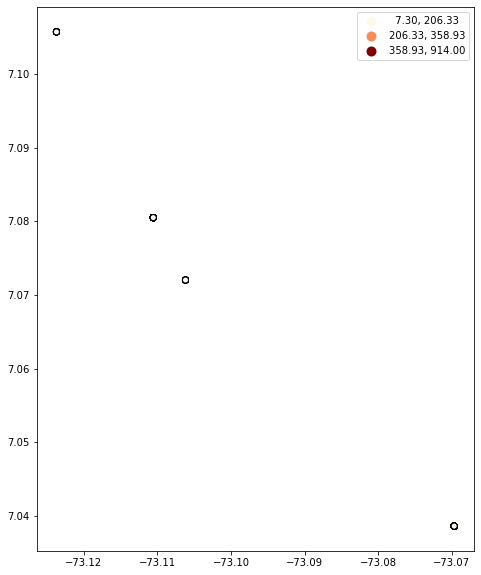

In [ ]:

mapa.plot(column='Magnitud', scheme='quantiles', k=3, cmap='OrRd', edgecolor='k', legend=True, figsize=(10,10))


In [ ]:
mapa=  gpd.GeoDataFrame(
    datosMarzo, geometry=gpd.points_from_xy(datosMarzo["Longitud"], datosMarzo["Latitud"]))

mapa

,Lugar,Locacion,Estacion,Latitud,Longitud,Magnitud,Fecha,geometry
7158,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,707.400000,2016-03-01,POINT (-73.06965 7.03857)
7159,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,696.200000,2016-03-01,POINT (-73.06965 7.03857)
7160,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,697.000000,2016-03-01,POINT (-73.06965 7.03857)
7161,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,720.000000,2016-03-01,POINT (-73.06965 7.03857)
7162,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,762.900000,2016-03-01,POINT (-73.06965 7.03857)
...,...,...,...,...,...,...,...,...
43889,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,378.200000,2016-03-24,POINT (-73.11057 7.08052)
43890,Paralela Bosque,Bucaramanga,Wunderground,7.080521,-73.110565,914.495319,2016-03-27,POINT (-73.11057 7.08052)
44012,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,550.339033,2016-03-05,POINT (-73.06965 7.03857)
44013,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,378.200000,2016-03-24,POINT (-73.06965 7.03857)


<AxesSubplot:>

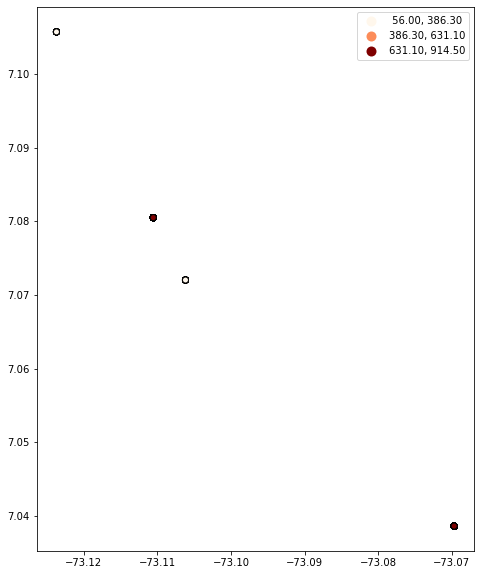

In [ ]:

mapa.plot(column='Magnitud', scheme='quantiles', k=3, cmap='OrRd', edgecolor='k', legend=True,figsize=(10,10))


In [ ]:
Datosappend = pd.DataFrame(
        columns=["Lugar", "Locacion", 'Estacion', 'Latitud', 'Longitud', 'Magnitud', 'Fecha'])

Datosappend["Magnitud"]=interpolacionOctubre["Resultado"]
Datosappend["Fecha"]=interpolacionOctubre["Fecha"]

Datosappend["Lugar"]="Clinica Foscal"
Datosappend["Locacion"]="Florida"
Datosappend["Estacion"]="Wunderground"
Datosappend["Latitud"]=7.0731729
Datosappend["Longitud"]=-73.109957

Datosappend

,Lugar,Locacion,Estacion,Latitud,Longitud,Magnitud,Fecha
0,Clinica Foscal,Florida,Wunderground,7.073173,-73.109957,10.472222,2016-10-01
1,Clinica Foscal,Florida,Wunderground,7.073173,-73.109957,126.862500,2016-10-02
2,Clinica Foscal,Florida,Wunderground,7.073173,-73.109957,86.883333,2016-10-03
3,Clinica Foscal,Florida,Wunderground,7.073173,-73.109957,224.831818,2016-10-04
4,Clinica Foscal,Florida,Wunderground,7.073173,-73.109957,405.392857,2016-10-05
5,Clinica Foscal,Florida,Wunderground,7.073173,-73.109957,166.100000,2016-10-06
6,Clinica Foscal,Florida,Wunderground,7.073173,-73.109957,390.879167,2016-10-07
7,Clinica Foscal,Florida,Wunderground,7.073173,-73.109957,213.012500,2016-10-08
8,Clinica Foscal,Florida,Wunderground,7.073173,-73.109957,283.954167,2016-10-09
9,Clinica Foscal,Florida,Wunderground,7.073173,-73.109957,484.700000,2016-10-10


In [ ]:
datosOctubre= datosOctubre.append(Datosappend,ignore_index=True)

del datosOctubre["geometry"]
datosOctubre

,Lugar,Locacion,Estacion,Latitud,Longitud,Magnitud,Fecha
0,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,7.300000,2016-10-01
1,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,7.600000,2016-10-01
2,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,9.900000,2016-10-01
3,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,11.300000,2016-10-01
4,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,11.300000,2016-10-01
...,...,...,...,...,...,...,...
733,Clinica Foscal,Florida,Wunderground,7.073173,-73.109957,238.030000,2016-10-27
734,Clinica Foscal,Florida,Wunderground,7.073173,-73.109957,375.600000,2016-10-28
735,Clinica Foscal,Florida,Wunderground,7.073173,-73.109957,182.775000,2016-10-29
736,Clinica Foscal,Florida,Wunderground,7.073173,-73.109957,451.368182,2016-10-30


In [ ]:
mapa=  gpd.GeoDataFrame(
    datosOctubre, geometry=gpd.points_from_xy(datosOctubre["Longitud"], datosOctubre["Latitud"]))

mapa

,Lugar,Locacion,Estacion,Latitud,Longitud,Magnitud,Fecha,geometry
0,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,7.300000,2016-10-01,POINT (-73.06965 7.03857)
1,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,7.600000,2016-10-01,POINT (-73.06965 7.03857)
2,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,9.900000,2016-10-01,POINT (-73.06965 7.03857)
3,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,11.300000,2016-10-01,POINT (-73.06965 7.03857)
4,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,11.300000,2016-10-01,POINT (-73.06965 7.03857)
...,...,...,...,...,...,...,...,...
733,Clinica Foscal,Florida,Wunderground,7.073173,-73.109957,238.030000,2016-10-27,POINT (-73.10996 7.07317)
734,Clinica Foscal,Florida,Wunderground,7.073173,-73.109957,375.600000,2016-10-28,POINT (-73.10996 7.07317)
735,Clinica Foscal,Florida,Wunderground,7.073173,-73.109957,182.775000,2016-10-29,POINT (-73.10996 7.07317)
736,Clinica Foscal,Florida,Wunderground,7.073173,-73.109957,451.368182,2016-10-30,POINT (-73.10996 7.07317)


<AxesSubplot:>

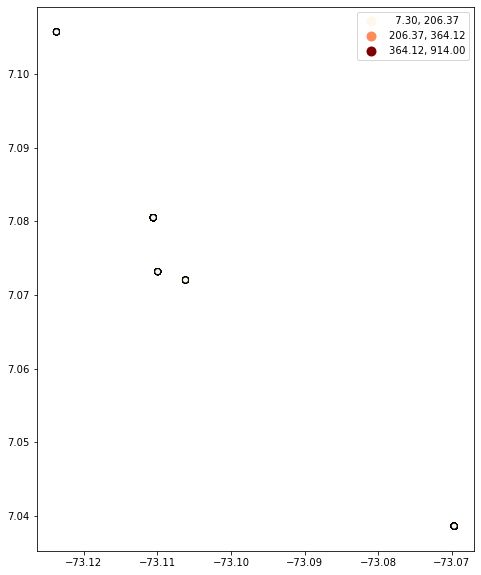

In [ ]:

mapa.plot(column='Magnitud', scheme='quantiles', k=3, cmap='OrRd', edgecolor='k', legend=True,figsize=(10,10))


In [ ]:
Datosappend = pd.DataFrame(
        columns=["Lugar", "Locacion", 'Estacion', 'Latitud', 'Longitud', 'Magnitud', 'Fecha'])

Datosappend["Magnitud"]=interpolacionOctubre["Resultado"]
Datosappend["Fecha"]=interpolacionOctubre["Fecha"]

Datosappend["Lugar"]="INEM - Custodio García Rovira"
Datosappend["Locacion"]="Florida"
Datosappend["Estacion"]="Wunderground"
Datosappend["Latitud"]=7.08526045
Datosappend["Longitud"]=-73.1192428760099

Datosappend

,Lugar,Locacion,Estacion,Latitud,Longitud,Magnitud,Fecha
0,INEM - Custodio García Rovira,Florida,Wunderground,7.08526,-73.119243,10.472222,2016-10-01
1,INEM - Custodio García Rovira,Florida,Wunderground,7.08526,-73.119243,126.862500,2016-10-02
2,INEM - Custodio García Rovira,Florida,Wunderground,7.08526,-73.119243,86.883333,2016-10-03
3,INEM - Custodio García Rovira,Florida,Wunderground,7.08526,-73.119243,224.831818,2016-10-04
4,INEM - Custodio García Rovira,Florida,Wunderground,7.08526,-73.119243,405.392857,2016-10-05
5,INEM - Custodio García Rovira,Florida,Wunderground,7.08526,-73.119243,166.100000,2016-10-06
6,INEM - Custodio García Rovira,Florida,Wunderground,7.08526,-73.119243,390.879167,2016-10-07
7,INEM - Custodio García Rovira,Florida,Wunderground,7.08526,-73.119243,213.012500,2016-10-08
8,INEM - Custodio García Rovira,Florida,Wunderground,7.08526,-73.119243,283.954167,2016-10-09
9,INEM - Custodio García Rovira,Florida,Wunderground,7.08526,-73.119243,484.700000,2016-10-10


In [ ]:
datosMarzo= datosMarzo.append(Datosappend,ignore_index=True)

del datosMarzo["geometry"]
datosMarzo

,Lugar,Locacion,Estacion,Latitud,Longitud,Magnitud,Fecha
0,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,707.400000,2016-03-01
1,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,696.200000,2016-03-01
2,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,697.000000,2016-03-01
3,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,720.000000,2016-03-01
4,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,762.900000,2016-03-01
...,...,...,...,...,...,...,...
744,INEM - Custodio García Rovira,Florida,Wunderground,7.085260,-73.119243,238.030000,2016-10-27
745,INEM - Custodio García Rovira,Florida,Wunderground,7.085260,-73.119243,375.600000,2016-10-28
746,INEM - Custodio García Rovira,Florida,Wunderground,7.085260,-73.119243,182.775000,2016-10-29
747,INEM - Custodio García Rovira,Florida,Wunderground,7.085260,-73.119243,451.368182,2016-10-30


In [ ]:
mapa=  gpd.GeoDataFrame(
    datosMarzo, geometry=gpd.points_from_xy(datosMarzo["Longitud"], datosMarzo["Latitud"]))

mapa

,Lugar,Locacion,Estacion,Latitud,Longitud,Magnitud,Fecha,geometry
0,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,707.400000,2016-03-01,POINT (-73.06965 7.03857)
1,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,696.200000,2016-03-01,POINT (-73.06965 7.03857)
2,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,697.000000,2016-03-01,POINT (-73.06965 7.03857)
3,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,720.000000,2016-03-01,POINT (-73.06965 7.03857)
4,UPB - Piedecuesta,Piedecuesta,Wunderground,7.038574,-73.069649,762.900000,2016-03-01,POINT (-73.06965 7.03857)
...,...,...,...,...,...,...,...,...
744,INEM - Custodio García Rovira,Florida,Wunderground,7.085260,-73.119243,238.030000,2016-10-27,POINT (-73.11924 7.08526)
745,INEM - Custodio García Rovira,Florida,Wunderground,7.085260,-73.119243,375.600000,2016-10-28,POINT (-73.11924 7.08526)
746,INEM - Custodio García Rovira,Florida,Wunderground,7.085260,-73.119243,182.775000,2016-10-29,POINT (-73.11924 7.08526)
747,INEM - Custodio García Rovira,Florida,Wunderground,7.085260,-73.119243,451.368182,2016-10-30,POINT (-73.11924 7.08526)


<AxesSubplot:>

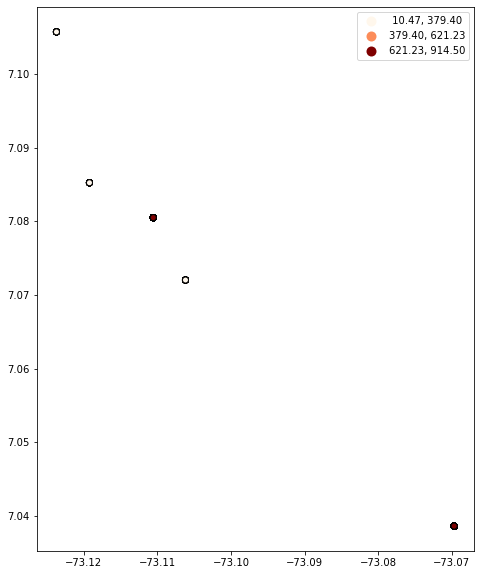

In [ ]:

mapa.plot(column='Magnitud', scheme='quantiles', k=3, cmap='OrRd', edgecolor='k', legend=True,figsize=(10,10))
